# Data mining midterm
# Xi Yan

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score
import time

%matplotlib inline
plt.style.use('seaborn-white')

### Data cleaning

In [234]:
# Load csv file, display top 5 rows
df = pd.read_csv('worldHapinness_2015_2020.csv')
df.head(5)

,country,Regional indicator,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [235]:
# Verify if there are any missing values, if yes, then drop the NaN value rows
df.info()
df.isnull().sum(axis=0)
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             935 non-null    object 
 1   Regional indicator  933 non-null    object 
 2   happinessScore      935 non-null    float64
 3   GDPperCap           935 non-null    float64
 4   socialSupport       935 non-null    float64
 5   healthLE            935 non-null    float64
 6   freedom             935 non-null    float64
 7   generosity          935 non-null    float64
 8   trustGovernment     934 non-null    float64
 9   year                935 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 73.2+ KB


In [236]:
# Turn regional indicator into numerical categories
df['Regional indicator'] = df['Regional indicator'].astype('category')
df['Regional indicator'] = df['Regional indicator'].cat.codes

"""
0- Central and Eastern Europe
1- Commonwealth of Independent States
2- East Asia
3- Latin America and Caribbean
4- Middle East and North Africa
5- North America and ANZ
6- Southern Asia
7- Southeastern Asia
8- Sub-Saharan Africa
9- Western Europe
"""

'\n0- Central and Eastern Europe\n1- Commonwealth of Independent States\n2- East Asia\n3- Latin America and Caribbean\n4- Middle East and North Africa\n5- North America and ANZ\n6- Southern Asia\n7- Southeastern Asia\n8- Sub-Saharan Africa\n9- Western Europe\n'

In [237]:
# Split data into 2015-2019 and 2020, drop country name since it should not be included in the training model set
df_1519 = df.loc[df['year'].isin([2015, 2016, 2017, 2018, 2019])]
df_20 = df.loc[df['year'] == 2020]


In [238]:
# Set up X, y, drop country names
X = df_1519.drop(['happinessScore', 'country'], axis=1)
y = df_1519['happinessScore']

### 2 Visualization plots

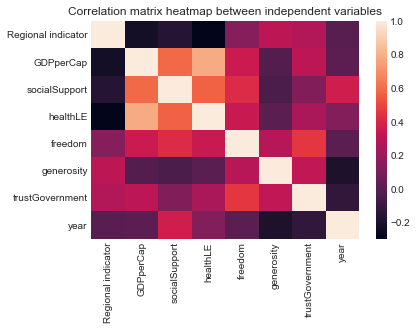

In [239]:
# Data visualization plots (first)
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,).set_title('Correlation matrix heatmap between independent variables')
plt.show()

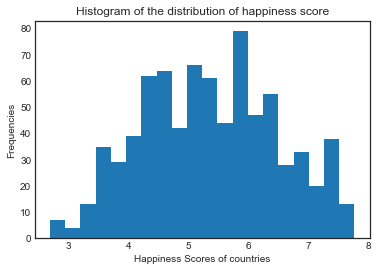

In [240]:
# Data visualization plots (second)
plt.hist(y, bins=20)
plt.xlabel('Happiness Scores of countries')
plt.ylabel('Frequencies')
plt.title('Histogram of the distribution of happiness score')
plt.show()

In [241]:
# Set up train and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Prediction: Step 1 Fit a model, First model - Linear regression

In [242]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train R^2 is', lm.score(X_train, y_train))
print('Test R^2 is', lm.score(X_test, y_test))

Train MSE is 0.27818234246035545
Test MSE is 0.32059351594341645
Train R^2 is 0.7888747512447358
Test R^2 is 0.7144171756012081


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Prediction: Step 1 Fit a model, Second model - Polynomial regression degree 1-6

In [243]:
for i in [1, 2, 3, 4, 5, 6]:
    poly_model = PolynomialFeatures(degree=i)

    X_poly_train = poly_model.fit_transform(X_train)
    X_poly_test = poly_model.fit_transform(X_test)

    lm_poly = LinearRegression(normalize=True)
    lm_poly.fit(X_poly_train, y_train)
    y_train_pred_poly = lm_poly.predict(X_poly_train)
    y_test_pred_poly = lm_poly.predict(X_poly_test)

    print('MSE for polynomial model degree', i, "train is", mean_squared_error(y_train, y_train_pred_poly))
    print('MSE for polynomial model degree', i, "test is", mean_squared_error(y_test, y_test_pred_poly))
    print('R^2 for polynomial model degree', i, "train is", lm_poly.score(X_poly_train, y_train))
    print('R^2 for polynomial model degree', i, "test is", lm_poly.score(X_poly_test, y_test))
    print('\n')

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

MSE for polynomial model degree 1 train is 0.27818234246035584
MSE for polynomial model degree 1 test is 0.32059351594341556
R^2 for polynomial model degree 1 train is 0.7888747512447355
R^2 for polynomial model degree 1 test is 0.7144171756012089


MSE for polynomial model degree 2 train is 0.21700503794827147
MSE for polynomial model degree 2 test is 0.2528401132321522
R^2 for polynomial model degree 2 train is 0.8353049937937609
R^2 for polynomial model degree 2 test is 0.7747715095058485


MSE for polynomial model degree 3 train is 0.11418765833744243
MSE for polynomial model degree 3 test is 0.278382140519873
R^2 for polynomial model degree 3 train is 0.9133377857197772
R^2 for polynomial model degree 3 test is 0.7520188213479703


MSE for polynomial model degree 4 train is 0.02050986728278804
MSE for polynomial model degree 4 test is 11.350211206843463
R^2 for polynomial model degree 4 train is 0.984434127652681
R^2 for polynomial model degree 4 test is -9.110701598048777


MSE f

From the MSE and R^2 above, we are able to see that degree 2 is the best model due to bias-variance trade-off. The MSE for both test and train data is one of the smallest, and the R^2 of test and train data is one of the highest among other degrees.

### Prediction: Step 1 Fit a model, Third model - LASSO regression

In [244]:
alphas = np.logspace(-5, 5, 200)
model_lassoCV = LassoCV(normalize=True, alphas=alphas, cv=10).fit(X_train, y_train)
y_train_pred_lasso = model_lassoCV.predict(X_train)
y_test_pred_lasso = model_lassoCV.predict(X_test)
print("LassoCV - best alpha: "+str(model_lassoCV.alpha_))
print("LassoCV train - R-squared: "+str(model_lassoCV.score(X_train, y_train)))
print("LassoCV test - R-squared: "+str(model_lassoCV.score(X_test, y_test)))
print('MSE for Lasso train is:', mean_squared_error(y_train, y_train_pred_lasso))
print('MSE for Lasso test is:', mean_squared_error(y_test, y_test_pred_lasso))


LassoCV - best alpha: 0.0004055460735840828
LassoCV train - R-squared: 0.788534826225302
LassoCV test - R-squared: 0.7163818581778771
MSE for Lasso train is: 0.2786302336468643
MSE for Lasso test is: 0.3183879754096218


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Based on these three models, I would conclude that Polynomial degree 2 regression is the best model out of the three models. Since it has the higher R-squared (0.84, 0.77) for both test and train data, while maintaining the lowest MSE (0.21, 0.25) for test and train data among them all.

### Prediction: Step 2 Feature selection - Forward stepwise selection

In [245]:
for i in range(1,len(X.columns)):
    model= LinearRegression()
    sfs = SequentialFeatureSelector(model,
                                n_features_to_select = i,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
    sfs = sfs.fit(X,y)
    feature_names= X_train.columns.values#column names for X
    print(i, "features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))
    print('\n')

1 features selected by forward sequential selection: ['GDPperCap']


2 features selected by forward sequential selection: ['GDPperCap' 'freedom']


3 features selected by forward sequential selection: ['GDPperCap' 'healthLE' 'freedom']


4 features selected by forward sequential selection: ['GDPperCap' 'healthLE' 'freedom' 'generosity']


5 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'generosity']


6 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'generosity'
 'trustGovernment']


7 features selected by forward sequential selection: ['Regional indicator' 'GDPperCap' 'socialSupport' 'healthLE' 'freedom'
 'generosity' 'trustGovernment']




Based on the forward stepwise selection, it shows that the top 3 most significant feature is GDPperCAP, freedom, and healthLE and the least 3 significant feature is regional indicator, trust government, social support.

Let's see if dropping the regional indicator and trust government is going to increase R^2 and decrease MSE for Polynomial degree 2 model or not.

### Prediction: Step 2 Feature selection - eliminate 'Regional indicator' and 'trustGovernment' features

In [251]:
# eliminate 'Regional indicator' and 'trustGovernment' features
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity']]

poly_model = PolynomialFeatures(degree=2)

X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)

lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)

print('Eliminated Regional indicator and trustGovernment features')
print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))
print('\n')

# eliminate 'Regional indicator' features
print('Eliminated Regional indicator features')
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment']]

poly_model = PolynomialFeatures(degree=2)

X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)

lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)

print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))

Eliminated Regional indicator and trustGovernment features
MSE for polynomial model degree 2 train is 0.2802714460473792
MSE for polynomial model degree 2 test is 0.28375499722876985
R^2 for polynomial model degree 2 train is 0.7872892353899732
R^2 for polynomial model degree 2 test is 0.7472327120921375


Eliminated Regional indicator features
MSE for polynomial model degree 2 train is 0.27011574966465157
MSE for polynomial model degree 2 test is 0.2768391783693554
R^2 for polynomial model degree 2 train is 0.7949968558885383
R^2 for polynomial model degree 2 test is 0.7533932829854384


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

The above code show that dropping any of the feature will increase MSE and reduce R^2 for both of train and test of the Polynomial degree 2 model, therefore, it shows that all features are significant to the model, therefore we should not eliminate any of the features.


### Prediction: Step 3 Predict 2020

### Reference
1. Convert categorical data in pandas dataframe https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/46186626
2. How do I select rows from a DataFrame based on column values? https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
3. Correlation heatmap https://stackoverflow.com/questions/39409866/correlation-heatmap
4. Homework 2 and lab 2 of data mining
5.
